# Digit Prediction Using CNN


In [1]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 13.9 MB/s 
     |████████████████████████████████| 1.6 MB 59.5 MB/s 


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
digit_mnist = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
(train_img, train_lable), (test_img,test_lable) = digit_mnist

In [5]:
print(train_img[0].shape)

(28, 28)


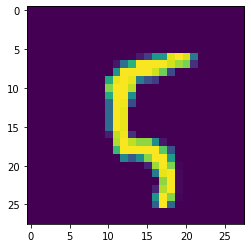

In [6]:
plt.imshow(train_img[100])

In [7]:
print(train_img.shape)
print(test_img.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
train_img = train_img/255
test_img = test_img/255

In [9]:
train_img = train_img.reshape(len(train_img),28,28,1)
test_img = test_img.reshape(len(test_img),28,28,1)

In [10]:
print(train_img.shape)
print(test_img.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
def build_model(Hp):
  cnnModel = keras.Sequential(
      [
          keras.layers.Conv2D(
              filters = Hp.Int('conv_1_filter',min_value = 32, max_value = 128, step = 12 ),
              kernel_size = Hp.Choice('conv_1_kernel',values=[3,5,7,10]),
              activation = 'relu',
              # kernel_initializer = 'he-uniform',
              # use_bias = True,
              # bias_initializer = 'he-normal',
              input_shape = (28,28,1)
          ),

          keras.layers.Conv2D(
              filters = Hp.Int('conv_2_filter',min_value = 32, max_value = 128, step = 16 ),
              kernel_size = Hp.Choice('conv_2_kernel',values=[3,5,7,10]),
              activation = 'relu',
              # kernel_initializer = 'he-uniform',
              # use_bias = True,
              # bias_initializer = 'he-normall',
          ),

          keras.layers.MaxPooling2D(
              pool_size=(2,2)
          ),

          keras.layers.Flatten(),

          keras.layers.Dense(10,activation='softmax')

      ]
  )
  cnnModel.compile(
      optimizer = keras.optimizers.Adam(
      Hp.Choice('learning_rate', values = [1e-2,1e-4,1e-5])),
      loss = 'sparse_categorical_crossentropy',
      metrics = ['accuracy']
  )
  return cnnModel

In [12]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [13]:
tuner_search = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 5,
    directory = 'output',
    project_name = "predict_digit"
)

In [14]:
tuner_search.search(train_img,train_lable,epochs=15,validation_split=0.1)

Trial 5 Complete [00h 02m 23s]
val_accuracy: 0.9746666550636292

Best val_accuracy So Far: 0.9919999837875366
Total elapsed time: 00h 12m 13s


In [15]:
model = tuner_search.get_best_models(num_models=1)[0]

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       3328      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 112)       358512    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 112)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 11200)             0         
                                                                 
 dense (Dense)               (None, 10)                112010    
                                                                 
Total params: 473,850
Trainable params: 473,850
Non-trainable params: 0
__________________________________________________

In [18]:
model.fit(train_img,train_lable,validation_split=0.3,epochs=20,initial_epoch=15)

Epoch 16/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0196 - val_accuracy: 0.9959
Epoch 17/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0209 - val_accuracy: 0.9962
Epoch 18/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 0.0224 - val_accuracy: 0.9954
Epoch 19/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0225 - val_accuracy: 0.9949
Epoch 20/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0253 - val_accuracy: 0.9947


In [19]:
model.evaluate(test_img,test_lable)

313/313 [==============================] - 1s 4ms/step - loss: 0.0225 - accuracy: 0.9927


[0.022485367953777313, 0.9926999807357788]

In [20]:
y_pred = model.predict(test_img)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [22]:
test_lable[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

# Converting the Image using DCT

In [23]:
from scipy import fft

In [24]:
train_img = train_img.reshape(len(train_img),28,28)
test_img = test_img.reshape(len(test_img),28,28)

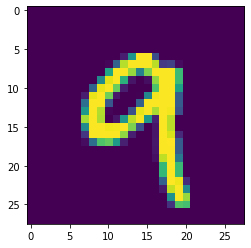

In [25]:
plt.imshow(train_img[110])

In [26]:
dct_train_img = fft.dct(train_img)
dct_test_img = fft.dct(test_img)

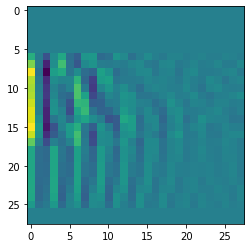

In [27]:
plt.imshow(dct_train_img[110])

In [28]:
dct_train_img = dct_train_img.reshape(len(dct_train_img),28,28,1)
dct_test_img = dct_test_img.reshape(len(dct_test_img),28,28,1)

In [30]:
model.fit(dct_train_img,train_lable,validation_split=0.3,epochs=20)

Epoch 1/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0601 - accuracy: 0.9815 - val_loss: 0.0802 - val_accuracy: 0.9767
Epoch 2/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0412 - accuracy: 0.9874 - val_loss: 0.0790 - val_accuracy: 0.9784
Epoch 3/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0292 - accuracy: 0.9915 - val_loss: 0.0708 - val_accuracy: 0.9800
Epoch 4/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0204 - accuracy: 0.9940 - val_loss: 0.0743 - val_accuracy: 0.9799
Epoch 5/20
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0133 - accuracy: 0.9964 - val_loss: 0.0697 - val_accuracy: 0.9815
Epoch 6/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.0791 - val_accuracy: 0.9802
Epoch 7/20
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.0815 - val_accura

In [31]:
model.evaluate(dct_test_img,test_lable)

313/313 [==============================] - 1s 4ms/step - loss: 0.0805 - accuracy: 0.9861


[0.08053826540708542, 0.9861000180244446]

In [32]:
dct_y_pred = model.predict(test_img)

In [33]:
dct_y_classes = [np.argmax(element) for element in dct_y_pred]
dct_y_classes[:10]

[7, 2, 6, 0, 5, 1, 2, 9, 5, 9]

In [34]:
test_lable[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

# No Idea

In [35]:
fft_train_img = np.fft.fft2(train_img)
fftshift_train_img = np.fft.fftshift(fft_train_img)

In [36]:
fft_test_img = np.fft.fft2(test_img)
fftshift_test_img = np.fft.fftshift(fft_test_img)

In [37]:
fftshift_train_img = fftshift_train_img.real
fftshift_test_img = fftshift_test_img.real

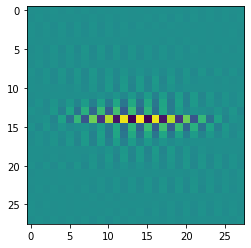

In [38]:
plt.imshow(fftshift_train_img[100])

In [39]:
fftshift_train_img = fftshift_train_img.reshape(len(fftshift_train_img),28,28,1)
fftshift_test_img =  fftshift_test_img.reshape(len(fftshift_test_img),28,28,1)

In [40]:
model.fit(fftshift_train_img,train_lable,validation_split=0.3,epochs=20)

Epoch 1/20
1313/1313 [==============================] - 9s 7ms/step - loss: 2.4778 - accuracy: 0.1082 - val_loss: 2.3077 - val_accuracy: 0.1062
Epoch 2/20
1313/1313 [==============================] - 9s 7ms/step - loss: 2.3010 - accuracy: 0.1152 - val_loss: 2.3074 - val_accuracy: 0.1071
Epoch 3/20
1313/1313 [==============================] - 9s 7ms/step - loss: 2.2964 - accuracy: 0.1182 - val_loss: 2.3091 - val_accuracy: 0.1077
Epoch 4/20
1313/1313 [==============================] - 9s 7ms/step - loss: 2.2899 - accuracy: 0.1216 - val_loss: 2.3145 - val_accuracy: 0.1059
Epoch 5/20
1313/1313 [==============================] - 10s 8ms/step - loss: 2.2796 - accuracy: 0.1284 - val_loss: 2.3227 - val_accuracy: 0.1050
Epoch 6/20
1313/1313 [==============================] - 10s 8ms/step - loss: 2.2662 - accuracy: 0.1353 - val_loss: 2.3277 - val_accuracy: 0.1063
Epoch 7/20
1313/1313 [==============================] - 9s 7ms/step - loss: 2.2508 - accuracy: 0.1437 - val_loss: 2.3455 - val_accurac

In [41]:
model.evaluate(fftshift_test_img,test_lable)

313/313 [==============================] - 1s 4ms/step - loss: 2.7113 - accuracy: 0.1031


[2.711313009262085, 0.1031000018119812]

In [42]:
fftshift_y_pred = model.predict(fftshift_test_img)

In [43]:
fftshift_y_classes = [np.argmax(element) for element in fftshift_y_pred]
fftshift_y_classes[:10]

[7, 1, 1, 4, 0, 2, 7, 4, 1, 3]

In [44]:
test_lable[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)